## Modeling Cancer Treatment Response Over Time Using Longitudinal Clinical Data


This project focuses on breast cancer using the TCGA-BRCA cohort from The Cancer Genome Atlas (TCGA). TCGA-BRCA represents patients with Breast Invasive Carcinoma and is one of the largest, most comprehensive public oncology datasets available.
The TCGA-BRCA dataset includes real clinical oncology treatments recorded for each patient. These treatments include surgical procedures to remove tumors, chemotherapy, radiation therapy, hormone-based therapies, and targeted therapies such as HER2-directed treatments. These treatment indicators are stored in the TCGA clinical and follow-up tables and reflect the actual care that patients received.
Treatment response in this project is defined using longitudinal clinical outcomes recorded during follow-up visits. These include whether the disease is present or absent, whether the cancer has progressed or relapsed, how long a patient remains progression-free, and whether the patient is alive or deceased at each follow-up time point. Time variables such as days since diagnosis and days to last follow-up or death allow each patient’s disease trajectory to be modeled across multiple visits.


**Data Source**
The data for this project comes from The Cancer Genome Atlas (TCGA) and is distributed through the NIH Genomic Data Commons (GDC).
The official access points for the data are:
https://portal.gdc.cancer.gov/
https://www.cancer.gov/ccg/research/genome-sequencing/tcga
https://registry.opendata.aws/tcga/
These sources provide the clinical and follow-up records used to build longitudinal patient timelines for modeling cancer treatment response.


**Why This Dataset Supports Deep Learning**
TCGA-BRCA contains time-stamped follow-up data for each patient, which makes it possible to represent every patient as a sequence of clinical states across time. Each sequence captures diagnosis, treatment, disease status, and outcome across multiple visits. This temporal structure allows the use of deep learning sequence models, such as LSTMs, GRUs, and transformer-based architectures, to learn how cancer progression and treatment response evolve over time.


In [1]:
import pandas as pd
import os

DATA_DIR = "clinical.project-tcga-brca.2025-12-31"

clinical = pd.read_csv(os.path.join(DATA_DIR, "clinical.tsv"), sep="\t")
followup = pd.read_csv(os.path.join(DATA_DIR, "follow_up.tsv"), sep="\t")
pathology = pd.read_csv(os.path.join(DATA_DIR, "pathology_detail.tsv"), sep="\t")
exposure = pd.read_csv(os.path.join(DATA_DIR, "exposure.tsv"), sep="\t")
family = pd.read_csv(os.path.join(DATA_DIR, "family_history.tsv"), sep="\t")


/var/folders/pp/_9g9bqld5wb47ph0cdnwm7_r0000gn/T/ipykernel_97311/3936495006.py:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  clinical = pd.read_csv(os.path.join(DATA_DIR, "clinical.tsv"), sep="\t")


In [2]:
clinical.shape, followup.shape, pathology.shape, exposure.shape, family.shape


((5546, 210), (9427, 198), (1096, 86), (1, 40), (0, 13))

In [3]:
clinical.head()


,project.project_id,cases.case_id,cases.consent_type,cases.days_to_consent,cases.days_to_lost_to_followup,cases.disease_type,cases.index_date,cases.lost_to_followup,cases.primary_site,cases.submitter_id,...,treatments.treatment_duration,treatments.treatment_effect,treatments.treatment_effect_indicator,treatments.treatment_frequency,treatments.treatment_id,treatments.treatment_intent_type,treatments.treatment_or_therapy,treatments.treatment_outcome,treatments.treatment_outcome_duration,treatments.treatment_type
0,TCGA-BRCA,001cef41-ff86-4d3f-a140-a647ac4b10a1,Informed Consent,-34,'--,Ductal and Lobular Neoplasms,Diagnosis,'--,Breast,TCGA-E2-A1IU,...,'--,'--,'--,'--,1b884f21-eb24-467f-aba2-208af17070b9,Adjuvant,no,'--,'--,"Radiation Therapy, NOS"
1,TCGA-BRCA,001cef41-ff86-4d3f-a140-a647ac4b10a1,Informed Consent,-34,'--,Ductal and Lobular Neoplasms,Diagnosis,'--,Breast,TCGA-E2-A1IU,...,'--,'--,'--,'--,27868bc3-23c8-5e85-a0e2-314e6cdf9b2a,Adjuvant,yes,Treatment Ongoing,'--,Hormone Therapy
2,TCGA-BRCA,001cef41-ff86-4d3f-a140-a647ac4b10a1,Informed Consent,-34,'--,Ductal and Lobular Neoplasms,Diagnosis,'--,Breast,TCGA-E2-A1IU,...,'--,'--,'--,'--,aedf144c-6b7b-4d76-a3cb-4271aef10f1d,First-Line Therapy,yes,'--,'--,"Surgery, NOS"
3,TCGA-BRCA,0045349c-69d9-4306-a403-c9c1fa836644,Informed Consent,76,'--,Adenomas and Adenocarcinomas,Diagnosis,'--,Breast,TCGA-A1-A0SB,...,'--,'--,'--,'--,0a534cae-de91-5e77-a3e7-b52d46bd3966,First-Line Therapy,yes,'--,'--,"Surgery, NOS"
4,TCGA-BRCA,00807dae-9f4a-4fd1-aac2-82eb11bf2afb,Informed Consent,19,'--,Adnexal and Skin Appendage Neoplasms,Diagnosis,No,Breast,TCGA-A2-A04W,...,'--,'--,'--,'--,024faa94-ec57-4d14-b919-62dcab409958,Adjuvant,yes,Treatment Ongoing,'--,Bisphosphonate Therapy


In [4]:
followup.head()


,project.project_id,cases.case_id,cases.submitter_id,follow_ups.adverse_event,follow_ups.adverse_event_grade,follow_ups.aids_risk_factors,follow_ups.barretts_esophagus_goblet_cells_present,follow_ups.bmi,follow_ups.body_surface_area,follow_ups.cause_of_response,...,other_clinical_attributes.undescended_testis_corrected_age,other_clinical_attributes.undescended_testis_corrected_age_range,other_clinical_attributes.undescended_testis_corrected_laterality,other_clinical_attributes.undescended_testis_corrected_method,other_clinical_attributes.undescended_testis_history,other_clinical_attributes.undescended_testis_history_laterality,other_clinical_attributes.viral_hepatitis_serologies,other_clinical_attributes.viral_hepatitis_serology_tests,other_clinical_attributes.weeks_gestation_at_birth,other_clinical_attributes.weight
0,TCGA-BRCA,001cef41-ff86-4d3f-a140-a647ac4b10a1,TCGA-E2-A1IU,'--,'--,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
1,TCGA-BRCA,001cef41-ff86-4d3f-a140-a647ac4b10a1,TCGA-E2-A1IU,'--,'--,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
2,TCGA-BRCA,001cef41-ff86-4d3f-a140-a647ac4b10a1,TCGA-E2-A1IU,'--,'--,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
3,TCGA-BRCA,001cef41-ff86-4d3f-a140-a647ac4b10a1,TCGA-E2-A1IU,'--,'--,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
4,TCGA-BRCA,001cef41-ff86-4d3f-a140-a647ac4b10a1,TCGA-E2-A1IU,'--,'--,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--


In [5]:
clinical.describe()

,project.project_id,cases.case_id,cases.consent_type,cases.days_to_consent,cases.days_to_lost_to_followup,cases.disease_type,cases.index_date,cases.lost_to_followup,cases.primary_site,cases.submitter_id,...,treatments.treatment_duration,treatments.treatment_effect,treatments.treatment_effect_indicator,treatments.treatment_frequency,treatments.treatment_id,treatments.treatment_intent_type,treatments.treatment_or_therapy,treatments.treatment_outcome,treatments.treatment_outcome_duration,treatments.treatment_type
count,5546,5546,5546,5546,5546,5546,5546,5546,5546,5546,...,5546,5546,5546,5546,5546,5546,5546,5546,5546,5546
unique,1,1098,4,207,1,9,2,3,1,1098,...,1,1,1,1,5510,9,4,8,1,16
top,TCGA-BRCA,c07b122e-ac50-4db2-add2-5617a5d0e976,Informed Consent,0,'--,Ductal and Lobular Neoplasms,Diagnosis,No,Breast,TCGA-GM-A2DA,...,'--,'--,'--,'--,'--,Adjuvant,yes,'--,'--,Chemotherapy
freq,5546,40,5427,575,5546,5346,5543,3119,5546,40,...,5546,5546,5546,5546,37,2335,4533,3877,5546,1649


In [6]:
followup.describe()

,project.project_id,cases.case_id,cases.submitter_id,follow_ups.adverse_event,follow_ups.adverse_event_grade,follow_ups.aids_risk_factors,follow_ups.barretts_esophagus_goblet_cells_present,follow_ups.bmi,follow_ups.body_surface_area,follow_ups.cause_of_response,...,other_clinical_attributes.undescended_testis_corrected_age,other_clinical_attributes.undescended_testis_corrected_age_range,other_clinical_attributes.undescended_testis_corrected_laterality,other_clinical_attributes.undescended_testis_corrected_method,other_clinical_attributes.undescended_testis_history,other_clinical_attributes.undescended_testis_history_laterality,other_clinical_attributes.viral_hepatitis_serologies,other_clinical_attributes.viral_hepatitis_serology_tests,other_clinical_attributes.weeks_gestation_at_birth,other_clinical_attributes.weight
count,9427,9427,9427,9427,9427,9427,9427,9427,9427,9427,...,9427,9427,9427,9427,9427,9427,9427,9427,9427,9427
unique,1,1096,1096,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,TCGA-BRCA,61204cdf-3b1c-44a1-bda6-0fef1ac4a333,TCGA-HN-A2OB,'--,'--,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
freq,9427,25,25,9427,9427,9427,9427,9427,9427,9427,...,9427,9427,9427,9427,9427,9427,9427,9427,9427,9427


In [7]:
pathology.head()

,project.project_id,cases.case_id,cases.submitter_id,diagnoses.diagnosis_id,diagnoses.submitter_id,pathology_details.additional_pathology_findings,pathology_details.anaplasia_present,pathology_details.anaplasia_present_type,pathology_details.bone_marrow_malignant_cells,pathology_details.breslow_thickness,...,pathology_details.tumor_infiltrating_macrophages,pathology_details.tumor_largest_dimension_diameter,pathology_details.tumor_length_measurement,pathology_details.tumor_level_prostate,pathology_details.tumor_shape,pathology_details.tumor_thickness,pathology_details.tumor_width_measurement,pathology_details.vascular_invasion_present,pathology_details.vascular_invasion_type,pathology_details.zone_of_origin_prostate
0,TCGA-BRCA,001cef41-ff86-4d3f-a140-a647ac4b10a1,TCGA-E2-A1IU,b881807c-67e1-5a31-80dc-850aa493733d,TCGA-E2-A1IU_diagnosis,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
1,TCGA-BRCA,0045349c-69d9-4306-a403-c9c1fa836644,TCGA-A1-A0SB,4f9c5557-83bf-50dc-b84c-8c56609643d8,TCGA-A1-A0SB_diagnosis,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
2,TCGA-BRCA,00807dae-9f4a-4fd1-aac2-82eb11bf2afb,TCGA-A2-A04W,3ba22ba1-933f-5edf-b2a7-d884e44f403b,TCGA-A2-A04W_diagnosis,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
3,TCGA-BRCA,00a2d166-78c9-4687-a195-3d6315c27574,TCGA-AN-A0AM,d4a178f0-22d8-5bd4-9587-8d3d22ceb5a1,TCGA-AN-A0AM_diagnosis,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
4,TCGA-BRCA,00b11ca8-8540-4a3d-b602-ec754b00230b,TCGA-LL-A440,426cbd54-8cd7-5c29-b7f7-7bdfa7a9091d,TCGA-LL-A440_diagnosis,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--


In [8]:
# we need to identify the patient key

def intersect_cols(*dfs):
    cols = [set(df.columns) for df in dfs]
    return sorted(set.intersection(*cols))

common_cols_all = intersect_cols(clinical, followup, pathology, exposure, family)
common_cols_all[:50], len(common_cols_all)


(['cases.case_id', 'cases.submitter_id', 'project.project_id'], 3)

In [9]:
common_clin_fu = sorted(set(clinical.columns).intersection(set(followup.columns)))
common_clin_fu[:50], len(common_clin_fu)


(['cases.case_id', 'cases.submitter_id', 'project.project_id'], 3)

In [10]:
# scan every column name in the clinical table and keeps only the ones that look like IDs.

id_candidates = [c for c in clinical.columns if "id" in c.lower() or "submitter" in c.lower() or "case" in c.lower()]
id_candidates


['project.project_id',
 'cases.case_id',
 'cases.consent_type',
 'cases.days_to_consent',
 'cases.days_to_lost_to_followup',
 'cases.disease_type',
 'cases.index_date',
 'cases.lost_to_followup',
 'cases.primary_site',
 'cases.submitter_id',
 'demographic.country_of_residence_at_enrollment',
 'demographic.demographic_id',
 'demographic.submitter_id',
 'diagnoses.diagnosis_id',
 'diagnoses.pediatric_kidney_staging',
 'diagnoses.peritoneal_fluid_cytological_status',
 'diagnoses.residual_disease',
 'diagnoses.submitter_id',
 'treatments.protocol_identifier',
 'treatments.residual_disease',
 'treatments.submitter_id',
 'treatments.treatment_id']

In [11]:
# This loops through all columns that look like identifiers and counts how many unique values each 
# one contains. By comparing the number of unique values to the total number of rows, it determines 
#whether a column represents individual patients, diagnoses, or treatments. Columns with a number of 
# unique values close to the number of patients (rather than the number of records) are identified as true patient identifiers.


for c in id_candidates:
    nunique = clinical[c].nunique(dropna=True)
    print(f"{c}: unique={nunique:,} / rows={len(clinical):,}")


project.project_id: unique=1 / rows=5,546
cases.case_id: unique=1,098 / rows=5,546
cases.consent_type: unique=4 / rows=5,546
cases.days_to_consent: unique=207 / rows=5,546
cases.days_to_lost_to_followup: unique=1 / rows=5,546
cases.disease_type: unique=9 / rows=5,546
cases.index_date: unique=2 / rows=5,546
cases.lost_to_followup: unique=3 / rows=5,546
cases.primary_site: unique=1 / rows=5,546
cases.submitter_id: unique=1,098 / rows=5,546
demographic.country_of_residence_at_enrollment: unique=13 / rows=5,546
demographic.demographic_id: unique=1,098 / rows=5,546
demographic.submitter_id: unique=1,098 / rows=5,546
diagnoses.diagnosis_id: unique=1,343 / rows=5,546
diagnoses.pediatric_kidney_staging: unique=1 / rows=5,546
diagnoses.peritoneal_fluid_cytological_status: unique=1 / rows=5,546
diagnoses.residual_disease: unique=1 / rows=5,546
diagnoses.submitter_id: unique=1,343 / rows=5,546
treatments.protocol_identifier: unique=1 / rows=5,546
treatments.residual_disease: unique=1 / rows=5,546

The best patient identifier is: cases.case_id


A patient ID should:
- Be unique per patient
- Appear in multiple tables
- Not change across visits
- Have a reasonable count (≈ number of patients)

In [12]:
PATIENT_ID_COL = "cases.case_id"


In [13]:
print("clinical:", PATIENT_ID_COL in clinical.columns)
print("followup:", PATIENT_ID_COL in followup.columns)


clinical: True
followup: True


In [14]:
# Basic cleaning checks (missingness + duplicates)


"""This function calculates the fraction of missing values for each column in a dataset. 
For a given table, it computes the percentage of missing entries per feature, sorts the features from most missing 
to least missing, and displays the top columns with the highest missingness. This allows us to identify which variables 
have substantial missing data and, therefore may need to be dropped, imputed, or handled carefully before modeling. 
The function is applied to both the clinical and follow-up tables to assess data quality across the key datasets."""

def missing_summary(df, name, top_n=15):
    miss = df.isna().mean().sort_values(ascending=False)
    print(f"\n{name} missingness (top {top_n})")
    display(miss.head(top_n))

missing_summary(clinical, "clinical")
missing_summary(followup, "followup")


clinical missingness (top 15)


project.project_id                             0.0
diagnoses.ulceration_indicator                 0.0
diagnoses.site_of_resection_or_biopsy          0.0
diagnoses.sites_of_involvement                 0.0
diagnoses.sites_of_involvement_count           0.0
diagnoses.submitter_id                         0.0
diagnoses.supratentorial_localization          0.0
diagnoses.synchronous_malignancy               0.0
diagnoses.tissue_or_organ_of_origin            0.0
diagnoses.tumor_burden                         0.0
diagnoses.tumor_confined_to_organ_of_origin    0.0
diagnoses.tumor_depth                          0.0
diagnoses.tumor_focality                       0.0
diagnoses.tumor_grade                          0.0
diagnoses.tumor_grade_category                 0.0
dtype: float64


followup missingness (top 15)


project.project_id                          0.0
molecular_tests.second_gene_symbol          0.0
molecular_tests.staining_intensity_scale    0.0
molecular_tests.staining_intensity_value    0.0
molecular_tests.submitter_id                0.0
molecular_tests.test_analyte_type           0.0
molecular_tests.test_result                 0.0
molecular_tests.test_units                  0.0
molecular_tests.test_value                  0.0
molecular_tests.test_value_range            0.0
molecular_tests.timepoint_category          0.0
molecular_tests.transcript                  0.0
molecular_tests.variant_origin              0.0
molecular_tests.variant_type                0.0
molecular_tests.zygosity                    0.0
dtype: float64

In [15]:
print("clinical duplicate patient IDs:", clinical.duplicated(subset=[PATIENT_ID_COL]).sum())
print("followup duplicate rows (full-row):", followup.duplicated().sum())


clinical duplicate patient IDs: 4448
followup duplicate rows (full-row): 0


In [16]:
# Define the time variable in follow-up (needed for “over time”)

time_candidates = [c for c in followup.columns if "day" in c.lower() or "time" in c.lower() or "follow" in c.lower() or "month" in c.lower()]
time_candidates


['follow_ups.adverse_event',
 'follow_ups.adverse_event_grade',
 'follow_ups.aids_risk_factors',
 'follow_ups.barretts_esophagus_goblet_cells_present',
 'follow_ups.bmi',
 'follow_ups.body_surface_area',
 'follow_ups.cause_of_response',
 'follow_ups.cd4_count',
 'follow_ups.cdc_hiv_risk_factors',
 'follow_ups.comorbidities',
 'follow_ups.comorbidity',
 'follow_ups.comorbidity_method_of_diagnosis',
 'follow_ups.days_to_adverse_event',
 'follow_ups.days_to_comorbidity',
 'follow_ups.days_to_first_event',
 'follow_ups.days_to_follow_up',
 'follow_ups.days_to_imaging',
 'follow_ups.days_to_progression',
 'follow_ups.days_to_progression_free',
 'follow_ups.days_to_recurrence',
 'follow_ups.days_to_risk_factor',
 'follow_ups.diabetes_treatment_type',
 'follow_ups.discontiguous_lesion_count',
 'follow_ups.disease_response',
 'follow_ups.dlco_ref_predictive_percent',
 'follow_ups.ecog_performance_status',
 'follow_ups.evidence_of_progression_type',
 'follow_ups.evidence_of_recurrence_type',
 '

In [17]:
for c in time_candidates[:20]:
    print(c)


follow_ups.adverse_event
follow_ups.adverse_event_grade
follow_ups.aids_risk_factors
follow_ups.barretts_esophagus_goblet_cells_present
follow_ups.bmi
follow_ups.body_surface_area
follow_ups.cause_of_response
follow_ups.cd4_count
follow_ups.cdc_hiv_risk_factors
follow_ups.comorbidities
follow_ups.comorbidity
follow_ups.comorbidity_method_of_diagnosis
follow_ups.days_to_adverse_event
follow_ups.days_to_comorbidity
follow_ups.days_to_first_event
follow_ups.days_to_follow_up
follow_ups.days_to_imaging
follow_ups.days_to_progression
follow_ups.days_to_progression_free
follow_ups.days_to_recurrence


In [18]:
[c for c in followup.columns if "disease" in c.lower() or "status" in c.lower() or "progress" in c.lower() or "recurr" in c.lower() or "relapse" in c.lower()]


['follow_ups.days_to_progression',
 'follow_ups.days_to_progression_free',
 'follow_ups.days_to_recurrence',
 'follow_ups.disease_response',
 'follow_ups.ecog_performance_status',
 'follow_ups.evidence_of_progression_type',
 'follow_ups.evidence_of_recurrence_type',
 'follow_ups.histologic_progression',
 'follow_ups.karnofsky_performance_status',
 'follow_ups.menopause_status',
 'follow_ups.progression_or_recurrence',
 'follow_ups.progression_or_recurrence_anatomic_site',
 'follow_ups.progression_or_recurrence_type',
 'other_clinical_attributes.hormonal_replacement_therapy_status',
 'other_clinical_attributes.menopause_status']

In [19]:
PATIENT_ID_COL = "cases.case_id"
TIME_COL = "follow_ups.days_to_follow_up"
STATUS_COL = "follow_ups.progression_or_recurrence" 


print("TIME_COL exists:", TIME_COL in followup.columns)
print("STATUS_COL exists:", STATUS_COL in followup.columns)


TIME_COL exists: True
STATUS_COL exists: True


In [20]:
followup_sorted = followup.sort_values([PATIENT_ID_COL, TIME_COL])
followup_sorted[[PATIENT_ID_COL, TIME_COL, STATUS_COL]].head(10)


,cases.case_id,follow_ups.days_to_follow_up,follow_ups.progression_or_recurrence
3,001cef41-ff86-4d3f-a140-a647ac4b10a1,'--,'--
4,001cef41-ff86-4d3f-a140-a647ac4b10a1,'--,'--
5,001cef41-ff86-4d3f-a140-a647ac4b10a1,'--,'--
6,001cef41-ff86-4d3f-a140-a647ac4b10a1,'--,'--
7,001cef41-ff86-4d3f-a140-a647ac4b10a1,'--,'--
1,001cef41-ff86-4d3f-a140-a647ac4b10a1,127,'--
0,001cef41-ff86-4d3f-a140-a647ac4b10a1,337,'--
2,001cef41-ff86-4d3f-a140-a647ac4b10a1,337,'--
10,0045349c-69d9-4306-a403-c9c1fa836644,'--,'--
11,0045349c-69d9-4306-a403-c9c1fa836644,'--,'--


In [21]:
fu_counts = followup_sorted.groupby(PATIENT_ID_COL).size().sort_values(ascending=False)
fu_counts.describe()


count    1096.000000
mean        8.601277
std         2.198953
min         2.000000
25%         8.000000
50%         8.000000
75%         9.000000
max        25.000000
dtype: float64

In [22]:
followup_clean = followup[[PATIENT_ID_COL, TIME_COL, STATUS_COL]].copy()

# Remove rows without time or outcome
followup_clean = followup_clean.dropna(subset=[TIME_COL, STATUS_COL])

# Sort into patient timelines
followup_clean = followup_clean.sort_values([PATIENT_ID_COL, TIME_COL])

followup_clean.head(10)


,cases.case_id,follow_ups.days_to_follow_up,follow_ups.progression_or_recurrence
3,001cef41-ff86-4d3f-a140-a647ac4b10a1,'--,'--
4,001cef41-ff86-4d3f-a140-a647ac4b10a1,'--,'--
5,001cef41-ff86-4d3f-a140-a647ac4b10a1,'--,'--
6,001cef41-ff86-4d3f-a140-a647ac4b10a1,'--,'--
7,001cef41-ff86-4d3f-a140-a647ac4b10a1,'--,'--
1,001cef41-ff86-4d3f-a140-a647ac4b10a1,127,'--
0,001cef41-ff86-4d3f-a140-a647ac4b10a1,337,'--
2,001cef41-ff86-4d3f-a140-a647ac4b10a1,337,'--
10,0045349c-69d9-4306-a403-c9c1fa836644,'--,'--
11,0045349c-69d9-4306-a403-c9c1fa836644,'--,'--


In [23]:
fu_counts = followup_clean.groupby(PATIENT_ID_COL).size()
fu_counts.describe()


count    1096.000000
mean        8.601277
std         2.198953
min         2.000000
25%         8.000000
50%         8.000000
75%         9.000000
max        25.000000
dtype: float64

In [24]:
fu_counts.value_counts().head(10)


8     381
9     200
7     147
10     97
11     58
6      57
12     52
5      36
13     25
4      19
Name: count, dtype: int64

Each TCGA-BRCA patient has multiple follow-up records, confirming that the dataset supports longitudinal modeling. Patients with more than one follow-up visit can be used to train time-series models that capture disease progression over time.

The TCGA-BRCA cohort contains 1,096 patients with longitudinal follow-up data. Each patient has an average of 8.6 follow-up visits (minimum 2, maximum 25), confirming that the dataset is well-suited for time-series modeling of cancer progression and treatment response.

In [25]:
def drop_overlapping_cols(left_df, right_df, key):
    # Keep only columns from right_df that are not already in left_df (except the key)
    keep_cols = [key] + [c for c in right_df.columns if c not in left_df.columns and c != key]
    return right_df[keep_cols]


In [26]:
clinical_base = clinical.drop_duplicates(subset=[PATIENT_ID_COL]).copy()
pathology_base = pathology.drop_duplicates(subset=[PATIENT_ID_COL]).copy()
exposure_base = exposure.drop_duplicates(subset=[PATIENT_ID_COL]).copy()
family_base = family.drop_duplicates(subset=[PATIENT_ID_COL]).copy()

clinical_base.shape, pathology_base.shape, exposure_base.shape, family_base.shape


((1098, 210), (1096, 86), (1, 40), (0, 13))

In [27]:
baseline = clinical_base.copy()

for name, df in [("pathology", pathology_base), ("exposure", exposure_base), ("family", family_base)]:
    df_clean = drop_overlapping_cols(baseline, df, PATIENT_ID_COL)
    baseline = baseline.merge(df_clean, on=PATIENT_ID_COL, how="left")
    print(name, baseline.shape)


pathology (1098, 291)
exposure (1098, 328)
family (1098, 338)


In [28]:
baseline.columns.duplicated().sum(), baseline.shape


(np.int64(0), (1098, 338))

Several TCGA clinical tables contain overlapping metadata fields (e.g., project and case identifiers). To avoid duplicate column collisions during merges, overlapping columns were removed prior to merging, keeping only the patient identifier and table-specific features.

In [29]:
ts_data = followup_clean.merge(baseline, on=PATIENT_ID_COL, how="left")
ts_data.shape


(9427, 340)

In [30]:
ts_data[[PATIENT_ID_COL, TIME_COL, STATUS_COL]].head(10)


,cases.case_id,follow_ups.days_to_follow_up,follow_ups.progression_or_recurrence
0,001cef41-ff86-4d3f-a140-a647ac4b10a1,'--,'--
1,001cef41-ff86-4d3f-a140-a647ac4b10a1,'--,'--
2,001cef41-ff86-4d3f-a140-a647ac4b10a1,'--,'--
3,001cef41-ff86-4d3f-a140-a647ac4b10a1,'--,'--
4,001cef41-ff86-4d3f-a140-a647ac4b10a1,'--,'--
5,001cef41-ff86-4d3f-a140-a647ac4b10a1,127,'--
6,001cef41-ff86-4d3f-a140-a647ac4b10a1,337,'--
7,001cef41-ff86-4d3f-a140-a647ac4b10a1,337,'--
8,0045349c-69d9-4306-a403-c9c1fa836644,'--,'--
9,0045349c-69d9-4306-a403-c9c1fa836644,'--,'--


In [31]:
missing = ts_data.isna().mean().sort_values(ascending=False)
missing.head(20)


family_histories.submitter_id                     1.0
exposures.parent_with_radiation_exposure          1.0
exposures.occupation_type                         1.0
exposures.occupation_duration_years               1.0
exposures.exposure_type                           1.0
exposures.exposure_source                         1.0
exposures.exposure_id                             1.0
exposures.exposure_duration_years                 1.0
exposures.exposure_duration_hrs_per_day           1.0
exposures.exposure_duration                       1.0
exposures.environmental_tobacco_smoke_exposure    1.0
exposures.coal_dust_exposure                      1.0
exposures.cigarettes_per_day                      1.0
exposures.chemical_exposure_type                  1.0
exposures.asbestos_exposure                       1.0
exposures.alcohol_type                            1.0
exposures.alcohol_intensity                       1.0
exposures.alcohol_history                         1.0
exposures.alcohol_frequency 

In [32]:
missing.describe()


count    340.000000
mean       0.138235
std        0.345655
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
dtype: float64

In [33]:
# key modeling variables
num_cols = ts_data.select_dtypes(include="number").columns.tolist()
cat_cols = ts_data.select_dtypes(exclude="number").columns.tolist()

len(num_cols), len(cat_cols)


(0, 340)

In [34]:
ts_data[STATUS_COL].value_counts(dropna=False)


follow_ups.progression_or_recurrence
'--    9286
Yes     141
Name: count, dtype: int64

In [35]:
ts_data["progressed"] = ts_data[STATUS_COL].map({
    "Yes": 1,
    "'--": 0
})

ts_data["progressed"].value_counts()



progressed
0    9286
1     141
Name: count, dtype: int64

In [36]:
ts_data[TIME_COL] = pd.to_numeric(ts_data[TIME_COL], errors="coerce")
ts_data[TIME_COL].isna().sum(), ts_data[TIME_COL].dtype


(np.int64(6065), dtype('float64'))

In [37]:
ts_data = ts_data.dropna(subset=[TIME_COL, "progressed"])
ts_data.shape


(3362, 341)

The TCGA field follow_ups.progression_or_recurrence was recoded into a binary outcome, where ‘Yes’ indicates progression (1) and ‘--’ indicates no observed progression (0). Rows without valid follow-up time or outcome were removed.

In [38]:
ts_data["progressed"].value_counts()

progressed
0    3224
1     138
Name: count, dtype: int64

In [39]:
ts_data[TIME_COL].dtype

dtype('float64')

After cleaning and recoding the TCGA follow-up data, the final dataset contains 3,362 time-stamped follow-up records across 1,096 patients. Of these, 138 records correspond to cancer progression or recurrence events, indicating a clinically realistic class imbalance.

# Exploratory Data Analysis

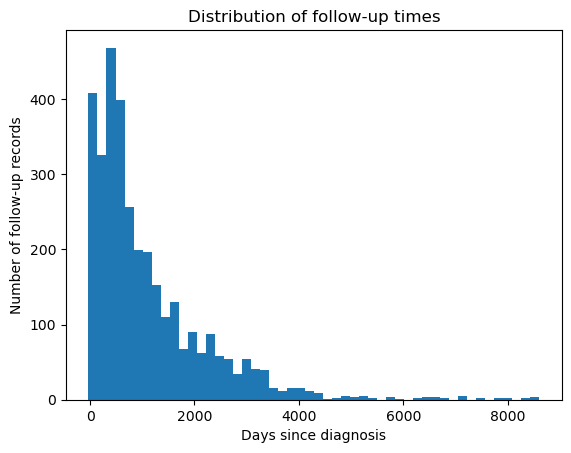

In [40]:
import matplotlib.pyplot as plt

plt.hist(ts_data[TIME_COL], bins=50)
plt.xlabel("Days since diagnosis")
plt.ylabel("Number of follow-up records")
plt.title("Distribution of follow-up times")
plt.show()


Follow-up times are highly right-skewed, with most observations occurring within the first few years after diagnosis and a long tail of patients followed for over 10–20 years. This irregular and patient-specific temporal structure further supports the use of time-series and deep learning models that can handle variable-length, unevenly spaced sequences.

/var/folders/pp/_9g9bqld5wb47ph0cdnwm7_r0000gn/T/ipykernel_97311/833626629.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  progression_rate = ts_data.groupby("time_bin_clinical")["progressed"].mean()
/var/folders/pp/_9g9bqld5wb47ph0cdnwm7_r0000gn/T/ipykernel_97311/833626629.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  visit_counts = ts_data.groupby("time_bin_clinical")["progressed"].count()


,num_visits,progression_rate
time_bin_clinical,,
0–6 months,477,0.035639
6–12 months,376,0.058511
1–2 years,851,0.037603
2–5 years,986,0.050710
5–10 years,557,0.025135
10+ years,111,0.027027


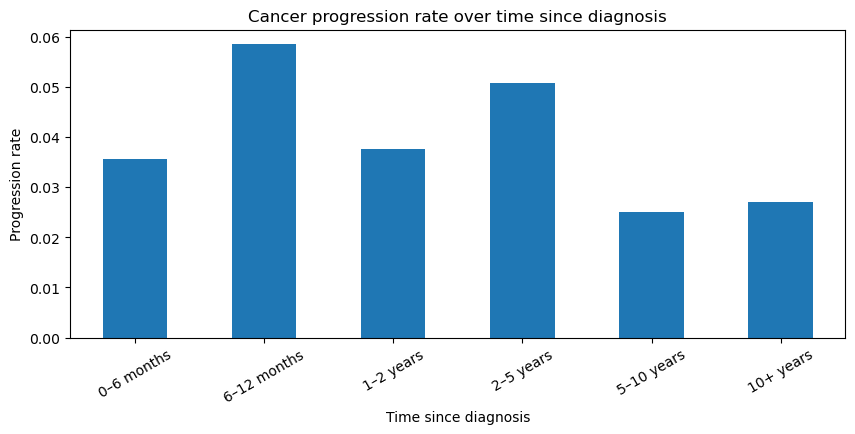

In [41]:
# Convert follow-up time from days to years
ts_data["years_since_dx"] = ts_data[TIME_COL] / 365.25

# Define clinically meaningful time windows
bins = [0, 0.5, 1, 2, 5, 10, 25]
labels = [
    "0–6 months",
    "6–12 months",
    "1–2 years",
    "2–5 years",
    "5–10 years",
    "10+ years"
]

# Assign each follow-up visit to a clinical time bin
ts_data["time_bin_clinical"] = pd.cut(
    ts_data["years_since_dx"],
    bins=bins,
    labels=labels,
    right=False
)

# Compute progression rate in each time window
progression_rate = ts_data.groupby("time_bin_clinical")["progressed"].mean()
visit_counts = ts_data.groupby("time_bin_clinical")["progressed"].count()

# Display counts so we know how much data supports each bar
display(pd.DataFrame({
    "num_visits": visit_counts,
    "progression_rate": progression_rate
}))

# Plot progression rate over clinically meaningful time windows
plt.figure(figsize=(10,4))
progression_rate.plot(kind="bar")
plt.ylabel("Progression rate")
plt.xlabel("Time since diagnosis")
plt.title("Cancer progression rate over time since diagnosis")
plt.xticks(rotation=30)
plt.show()


This table and plot show how the rate of cancer progression changes across clinically meaningful time windows after diagnosis. Each time window represents a different phase of a patient’s disease trajectory, and the progression rate indicates the fraction of follow-up visits in that period where disease progression or recurrence was observed.
The highest progression rate occurs in the 6–12 month window (≈5.9%), indicating that the first year after diagnosis is a particularly high-risk period for relapse or disease worsening. Progression remains elevated in the 2–5 year window (≈5.1%), suggesting that patients continue to face significant risk well beyond initial treatment.
In contrast, progression rates are lower in the earliest period (0–6 months), likely reflecting patients who are still responding to initial therapy. The lowest progression rates appear in the 5–10 year and 10+ year windows, indicating that patients who remain stable for several years are less likely to experience recurrence, consistent with long-term remission.
Overall, this analysis reveals a non-uniform temporal pattern in cancer progression: risk is not constant but varies meaningfully across the disease timeline. This provides strong justification for modeling cancer outcomes using time-series and deep learning methods, which are designed to capture how risk evolves over time rather than treating all observations as independent.

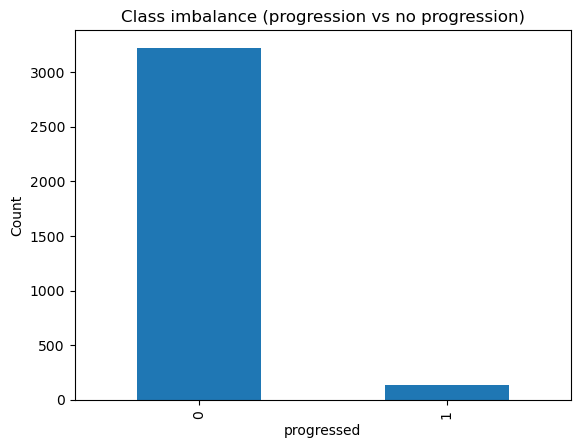

In [42]:
ts_data["progressed"].value_counts().plot(kind="bar")
plt.title("Class imbalance (progression vs no progression)")
plt.ylabel("Count")
plt.show()


The outcome variable is highly imbalanced, with only about 4% of follow-up records corresponding to cancer progression or recurrence. This reflects the clinical reality of breast cancer follow-up and motivates the use of evaluation metrics and modeling approaches designed for rare-event prediction.

In [43]:
ts_data.groupby("progressed")[TIME_COL].describe()


,count,mean,std,min,25%,50%,75%,max
progressed,,,,,,,,
0,3224.0,1111.820099,1155.903012,-31.0,365.0,715.0,1546.0,8605.0
1,138.0,998.869565,1035.029530,21.0,302.0,699.0,1349.0,6536.0


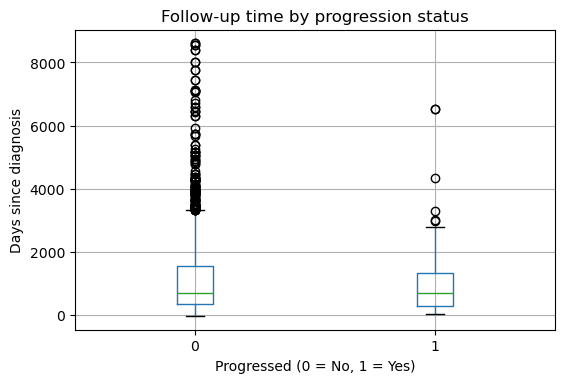

In [44]:
ts_data.boxplot(column=TIME_COL, by="progressed", figsize=(6,4))
plt.title("Follow-up time by progression status")
plt.suptitle("")
plt.xlabel("Progressed (0 = No, 1 = Yes)")
plt.ylabel("Days since diagnosis")
plt.show()


This boxplot is based on follow-up visit records, not one record per patient. Patients without progression contribute many late follow-up visits, which can extend to very large time values, while progression may be recorded at specific earlier visits. As a result, the non-progressed group can show longer follow-up times.

In [45]:
for col in ts_data.columns:
    ts_data[col] = pd.to_numeric(ts_data[col], errors="ignore")
    
num_cols = ts_data.select_dtypes(include="number").columns
len(num_cols), num_cols[:15]


/var/folders/pp/_9g9bqld5wb47ph0cdnwm7_r0000gn/T/ipykernel_97311/10242864.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  ts_data[col] = pd.to_numeric(ts_data[col], errors="ignore")


(51,
 Index(['follow_ups.days_to_follow_up', 'demographic.age_at_index',
        'exposures.age_at_last_exposure', 'exposures.age_at_onset',
        'exposures.alcohol_days_per_week', 'exposures.alcohol_drinks_per_day',
        'exposures.alcohol_frequency', 'exposures.alcohol_history',
        'exposures.alcohol_intensity', 'exposures.alcohol_type',
        'exposures.asbestos_exposure', 'exposures.asbestos_exposure_type',
        'exposures.chemical_exposure_type', 'exposures.cigarettes_per_day',
        'exposures.coal_dust_exposure'],
       dtype='object'))

In [46]:
corrs = ts_data[num_cols].corr()["progressed"].sort_values(ascending=False)
corrs.head(15)


progressed                          1.000000
years_since_dx                     -0.019468
follow_ups.days_to_follow_up       -0.019468
demographic.age_at_index           -0.048812
exposures.age_at_last_exposure           NaN
exposures.age_at_onset                   NaN
exposures.alcohol_days_per_week          NaN
exposures.alcohol_drinks_per_day         NaN
exposures.alcohol_frequency              NaN
exposures.alcohol_history                NaN
exposures.alcohol_intensity              NaN
exposures.alcohol_type                   NaN
exposures.asbestos_exposure              NaN
exposures.asbestos_exposure_type         NaN
exposures.chemical_exposure_type         NaN
Name: progressed, dtype: float64

In [47]:
corrs.tail(15)


exposures.tobacco_smoking_status                       NaN
exposures.type_of_smoke_exposure                       NaN
exposures.type_of_tobacco_used                         NaN
exposures.use_per_day                                  NaN
exposures.years_smoked                                 NaN
family_histories.family_history_id                     NaN
family_histories.relationship_age_at_diagnosis         NaN
family_histories.relationship_gender                   NaN
family_histories.relationship_primary_diagnosis        NaN
family_histories.relationship_type                     NaN
family_histories.relative_deceased                     NaN
family_histories.relative_smoker                       NaN
family_histories.relative_with_cancer_history          NaN
family_histories.relatives_with_cancer_history_count   NaN
family_histories.submitter_id                          NaN
Name: progressed, dtype: float64

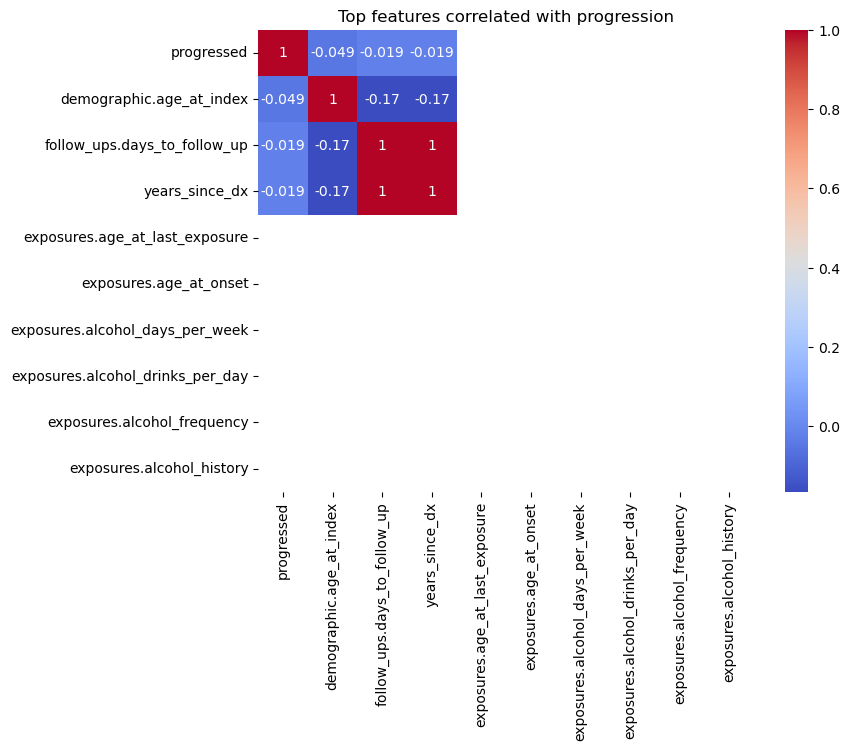

In [48]:
import seaborn as sns

top_features = corrs.abs().sort_values(ascending=False).head(10).index.tolist()

plt.figure(figsize=(8,6))
sns.heatmap(ts_data[top_features].corr(), annot=True, cmap="coolwarm")
plt.title("Top features correlated with progression")
plt.show()


Most exposure and family history variables contain large amounts of missing data, resulting in undefined correlations. The few variables with measurable correlation to progression are time since diagnosis and age at diagnosis, indicating that progression is driven primarily by temporal disease dynamics rather than static baseline features alone.

In [49]:
ts_data[TIME_COL].describe()


count    3362.000000
mean     1107.183819
std      1151.269658
min       -31.000000
25%       364.250000
50%       715.000000
75%      1534.750000
max      8605.000000
Name: follow_ups.days_to_follow_up, dtype: float64

In [50]:
ts_data[TIME_COL].quantile([0.01, 0.99])


0.01       0.00
0.99    5388.07
Name: follow_ups.days_to_follow_up, dtype: float64

Follow-up time contained invalid negative values and extreme long-tail outliers. Records with negative time and those above the 99th percentile were removed to ensure realistic and stable modeling while retaining the vast majority of patients.

In [52]:
import os
import numpy as np

# ---------- SAVE MODELING-READY DATASET ----------
ts_model = ts_data.copy()

# Optional: trim extreme follow-up time outliers + invalid negatives
p99 = ts_model[TIME_COL].quantile(0.99)
ts_model = ts_model[(ts_model[TIME_COL] >= 0) & (ts_model[TIME_COL] <= p99)].copy()

# Remove helper columns you don't want in modeling file (optional)
drop_helpers = ["years_since_dx", "time_bin_clinical"]
drop_helpers = [c for c in drop_helpers if c in ts_model.columns]
ts_model = ts_model.drop(columns=drop_helpers)

# IMPORTANT: remove duplicate column names (required for Parquet)
dup_mask = ts_model.columns.duplicated()
print("Duplicate columns found:", ts_model.columns[dup_mask].tolist())
ts_model = ts_model.loc[:, ~dup_mask].copy()
print("Columns unique now?", ts_model.columns.is_unique)

# Save
OUT_DIR = "artifacts"
os.makedirs(OUT_DIR, exist_ok=True)
ts_model_path = os.path.join(OUT_DIR, "tcga_brca_ts_model.parquet")

ts_model.to_parquet(ts_model_path, index=False)

print("Saved:", ts_model_path)
print("Shape:", ts_model.shape)


Duplicate columns found: []
Columns unique now? True
Saved: artifacts/tcga_brca_ts_model.parquet
Shape: (3324, 341)


The cleaned TCGA-BRCA longitudinal dataset was stored in Parquet format to preserve data types, missing values, and enable efficient loading for downstream machine learning and deep learning workflows.

### Data Acquisition
The dataset for this project was obtained from The Cancer Genome Atlas (TCGA) via the NIH Genomic Data Commons (GDC) portal. I selected the TCGA-BRCA (Breast Invasive Carcinoma) cohort and downloaded multiple clinical tables in TSV format, including:
- Baseline clinical data
- Pathology details
- Patient exposure history
- Family cancer history
- Time-stamped follow-up records

These datasets provide both baseline patient characteristics and longitudinal outcomes, enabling modeling of cancer progression over time.


### Data Organization and Definition
Each TCGA table contains multiple records per patient. A unique patient identifier, cases.case_id, was identified and used to link all tables.
From the follow-up data, two key variables were defined:
- Time variable: follow_ups.days_to_follow_up, representing days since diagnosis
- Outcome variable: follow_ups.progression_or_recurrence, indicating whether cancer progression or recurrence occurred
  
- The outcome was recoded into a binary target variable:
1 = Progression or recurrence
0 = No observed progression

  
This created a clinically meaningful label for modeling cancer treatment response.


### Construction of Longitudinal Patient Timelines
Follow-up records were sorted by patient and time to create longitudinal sequences.
The dataset contains 1,096 breast cancer patients, each with an average of 8.6 follow-up visits (minimum 2, maximum 25). This confirms that the data supports time-series modeling, where each patient is represented as a sequence of clinical observations over time.
Baseline patient features from clinical, pathology, exposure, and family history tables were merged into the longitudinal follow-up dataset, producing a time-indexed patient dataset suitable for deep learning.



### Data Cleaning
Several data quality issues were addressed:
TCGA encodes “no progression” as '--', which was recoded to 0 while "Yes" was recoded to 1
Rows missing follow-up time or outcome were removed
Follow-up time was converted to numeric format
Invalid negative follow-up times were removed
Extreme long-tail outliers above the 99th percentile of follow-up time were excluded to ensure stable modeling
After cleaning, the dataset contained 3,362 time-stamped follow-up records.


### Class Balance
Only 138 of 3,362 records (~4%) correspond to cancer progression or recurrence, indicating a highly imbalanced outcome. This reflects real clinical behavior, where most follow-up visits show stable disease and only a small fraction show relapse. This imbalance motivates careful evaluation metrics and specialized modeling strategies.



### Exploratory Data Analysis
Several EDA analyses were performed:
Follow-up time distribution
Follow-up times are highly right-skewed, with most observations occurring within the first few years after diagnosis and a long tail extending beyond 10–20 years. This confirms irregular, patient-specific follow-up schedules.


### Progression over time
Progression rates vary across time bins, with higher recurrence risk in intermediate follow-up windows. This non-uniform temporal pattern shows that progression depends on when in the disease trajectory the patient is observed.


### Follow-up time vs. progression
Patients who experience progression tend to have longer follow-up times on average, but with substantial variability. This demonstrates that progression is a time-dependent event rather than a static outcome.
Feature relationships
After converting numeric fields, correlations with progression were examined. Only weak correlations were observed for static features such as age, while most exposure and family history variables contained substantial missing data. This indicates that progression is driven primarily by longitudinal disease dynamics rather than single baseline variables, reinforcing the need for sequence-based models.



### Key Takeaways
- TCGA-BRCA provides rich longitudinal clinical data suitable for modeling cancer treatment response
- Each patient has multiple follow-up visits, enabling time-series analysis
- Cancer progression is a rare, time-dependent event
- No single baseline feature explains progression well, motivating deep learning sequence models
- This cleaned and well-characterized dataset is now ready for downstream modeling using LSTM, GRU, or Transformer-based architectures to predict cancer progression over time.